In [1]:
!pip install -U rebound

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.6/709.6 kB 5.0 MB/s eta 0:00:00


## **CONTOH MASALAH TIGA BENDA DENGAN CLOSE ENCOUNTER**

REBOUND menghitung jarak minimum antar semua benda tiap step waktu. Jika jarak tersebut kurang dari `sim.exit_min_distance`, maka integrasi dihentikan (dengan memanfaatkan fitur blok eksepsi pada `python`). Akan digunakan kriteria tiga radius Hill sebagai kriteria *close encounter*, yaitu $3\, r_{\rm Hill} \approx 3a \sqrt[3]{\frac{m}{3M}}$.

In [2]:
import rebound
import numpy as np

In [3]:
def setupSimulation():
    sim = rebound.Simulation()

    sim.integrator = "ias15" # IAS15 adalah integrator baku (default), sehingga baris ini tidak ditulis juga tidak masalah

    # yr2pi = year divided by 2pi, with year defined as orbital period of planet at 1AU around 1Msun star --> G = 1
    sim.units = ('au', 'msun', 'yr2pi')

    sim.add(m = 1)
    sim.add(m = 1e-3, a = 1)
    sim.add(m = 5e-3, a = 1.25)

    sim.N_active = sim.N

    sim.move_to_com()
    return sim

In [4]:
sim = setupSimulation()

# Integrasi 100 kali periode orbit
sim.integrate(100 * 2 * np.pi)

In [5]:
# explore the final particle orbits

for o in sim.calculate_orbits():
    print(o)

<rebound.Orbit instance, a=4.809720486488542 e=0.7193700826346077 inc=0.0 Omega=0.0 omega=2.7347696638894394 f=4.187658188301882>
<rebound.Orbit instance, a=1.0422460755676433 e=0.12262877234555292 inc=0.0 Omega=0.0 omega=5.928308388740907 f=4.841671336836489>


# The **orbits of both planets changed significantly**. Was there **close encounter(s)?**

Redo the simulation.

REBOUND calculates the minimum distance between all particle pairs each timestep. If the distance is less than `sim.exit_min_distance`, then the integration is stopped and an exception thrown. Here, we'll use three times the Hill radius as the criteria for a close encounter. It is given by $3\,r_{\rm Hill} \approx 3a \sqrt[3]{\frac{m}{3M}}$.

In [14]:
# Resets everything
sim = setupSimulation()

sim.exit_min_distance = 0.15

In [15]:
Noutputs  = 1000
times     = np.linspace(0, 100 * 2 * np.pi, Noutputs)
distances = np.zeros(Noutputs)

In [16]:
# ps is now an array of pointers. It will update as the simulation runs.

ps = sim.particles

In [17]:
try:
    for i, time in enumerate(times):
        sim.integrate(time)

        # Calculates the coponentwise difference between particles
        dp = ps[1] - ps[2]

        distances[i] = np.sqrt(dp.x * dp.x + dp.y * dp.y + dp.z * dp.z)
except rebound.Encounter as error:
    print(error)

Two particles had a close encounter (d<exit_min_distance).


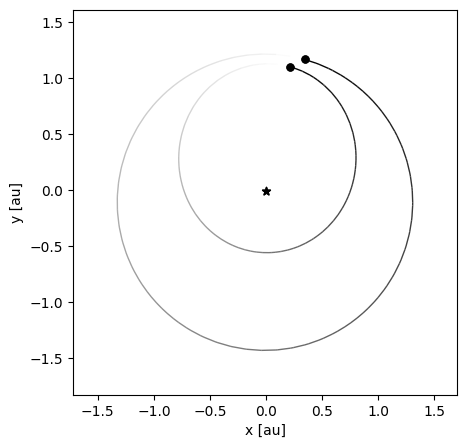

In [18]:
fig = rebound.OrbitPlot(sim, unitlabel="[au]")

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


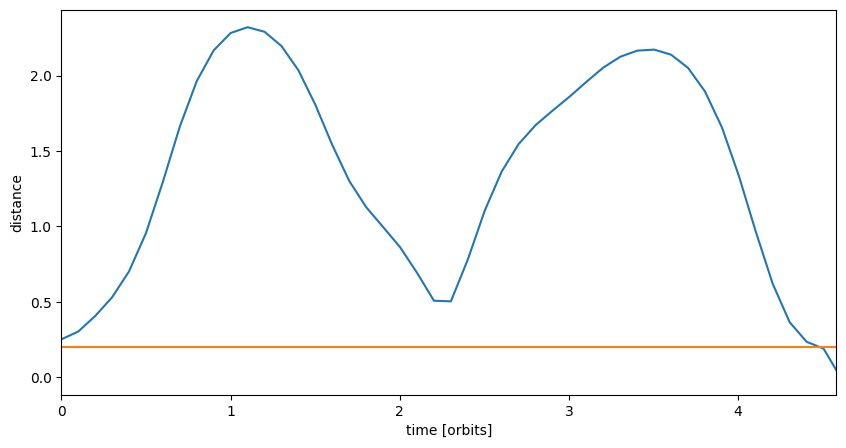

In [11]:
fig = plt.figure(figsize = (10, 5))
ax  = plt.subplot(111)

ax.set_xlabel('time [orbits]')
ax.set_xlim([0, sim.t/(2 * np.pi)])
ax.set_ylabel('distance')

plt.plot(times/(2 * np.pi), distances);
plt.plot([0.0, 12], [0.2, 0.2]); # Plot our close encounter criteria;

plt.savefig('/content/gdrive/My Drive/Colab Notebooks/rebound/encounter.pdf')

In [12]:
print(f'Current number of particles        = {sim.N:d}')
print(f'Current number of active particles = {sim.N_active:d}')
print(f'Current number of real particles   = {sim.N_real:d}')
print(f'Integrator                         : {sim.integrator}')
print(f'Simulation units                   : {sim.units}')
print(f'Gravity                            : {sim.gravity}')
print(f'Softening                          = {sim.softening}')
print(f'G constant                         = {sim.G:E}')
print(f'Test particle type                 = {sim.testparticle_type}')
print(f'Time                               = {sim.t:E}')
print(f'Timestep                           = {sim.dt:E}')
print(f'Last timestep done                 = {sim.dt_last_done:E}')
print(f'Python walltime                    = {sim.walltime:E}')
print(f'Simulation status                  : {sim.status}')
print(f'Simulation message                 : {sim.messages}')

Current number of particles        = 3
Current number of active particles = 3
Current number of real particles   = 3
Integrator                         : ias15
Simulation units                   : {'length': 'au', 'mass': 'msun', 'time': 'yr2pi'}
Gravity                            : basic
Softening                          = 0.0
G constant                         = 1.000000E+00
Test particle type                 = 0
Time                               = 2.877485E+01
Timestep                           = 7.935914E-02
Last timestep done                 = 3.912892E-02
Python walltime                    = 1.479800E-02
Simulation status                  : <bound method Simulation.status of <rebound.simulation.Simulation object at 0x78b880f32440, N=3, t=28.7748543018899>>
Simulation message                 : None


In [13]:
sim = None

#### Akibat *close encounter*, terjadi *merger* sehingga jumlah partikel (objek) berkurang. Pada blok di atas, jumlah partikel belum berubah karena perhitungan *merger* belum dimasukkan. Untuk selengkapnya, silakan telaah lebih lanjut dengan mengikuti contoh notebook di dokumentasi online REBOUND [di sini](https://rebound.readthedocs.io/en/latest/ipython_examples/CloseEncounters/).